<a href="https://colab.research.google.com/github/jayarnim/M2-Statistics/blob/main/HW1_M2023506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/KMU-Grad/M2-Statistics/

Mounted at /content/drive
/content/drive/MyDrive/KMU-Grad/M2-Statistics


In [68]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
from statsmodels.graphics.mosaicplot import mosaic

import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Homework 1

데이터 세트 `airbnb.csv` 는 airbnb 에 등록된 샌프란시스코 지역의 listing 데이터의 일부이다.

- `id`: listing id
- `room_type`: 집 또는 방의 형태
    - `entire home/apt`
    - `private room`
    - `shared room`
- `number_of_reviews`: 총 리뷰 수
- `review_scores_rating`: 전체 리뷰 점수
- `review_scores_accuracy`, `review_scores_cleanliness`, `review_scores_checkin`, `review_scores_communication`, `review_scores_location`, `review_scores_value`: 각 부분의 리뷰 점수
- `reviews_per_month`: 월 평균 리뷰 수
- `Downtown`: Downtown 까지의 거리
- `PerCapitaIncome`: 해당 지역의 소득수준
- `most_freq_aspect`: listing description 에서 가장 많이 나타난 주제

아래의 질문에 답하기 위해 적절한 통계량/그래프를 출력하고 서술하시오.</br> 완성된 답안은 **html 혹은 pdf** 파일로 다운받아 제출하시오. (File>Download as>HTML)


In [3]:
data = pd.read_csv('Datasets/airbnb.csv')

In [4]:
data.head()

,id,room_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome,most_freq_aspect
0,958,Entire home/apt,222.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.77,4068.132073,110777,int_style
1,3850,Private room,167.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.33,6792.053605,93008,comm
2,5858,Entire home/apt,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,5666.128342,69778,nature
3,7918,Private room,18.0,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,5573.866947,99041,comm
4,8142,Private room,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,5632.882874,99041,comm


## 1. 데이터가 포함한 다음 변수의 측정척도를 구분하시오.
- `id` : 명목 척도
- `room_type` : 순서 척도
- `number_of_reviews` : 구간 척도
- `Downtown` : 구간 척도
- `most_freq_aspect` : 명목 척도

## 2. `reviews_per_month`의 평균, 중위수를 계산하고 비교하여 분포의 모양을 추측해보시오.

In [6]:
# 평균이 중위수보다 크므로 좌측으로 편향된 분포일 것임

data["reviews_per_month"].mean(), data["reviews_per_month"].median()

(1.8882506142506144, 1.03)

## 3. `reviews_per_month`의 히스토그램을 통해 위에서 추측한 사실이 맞는지 확인해보시오.

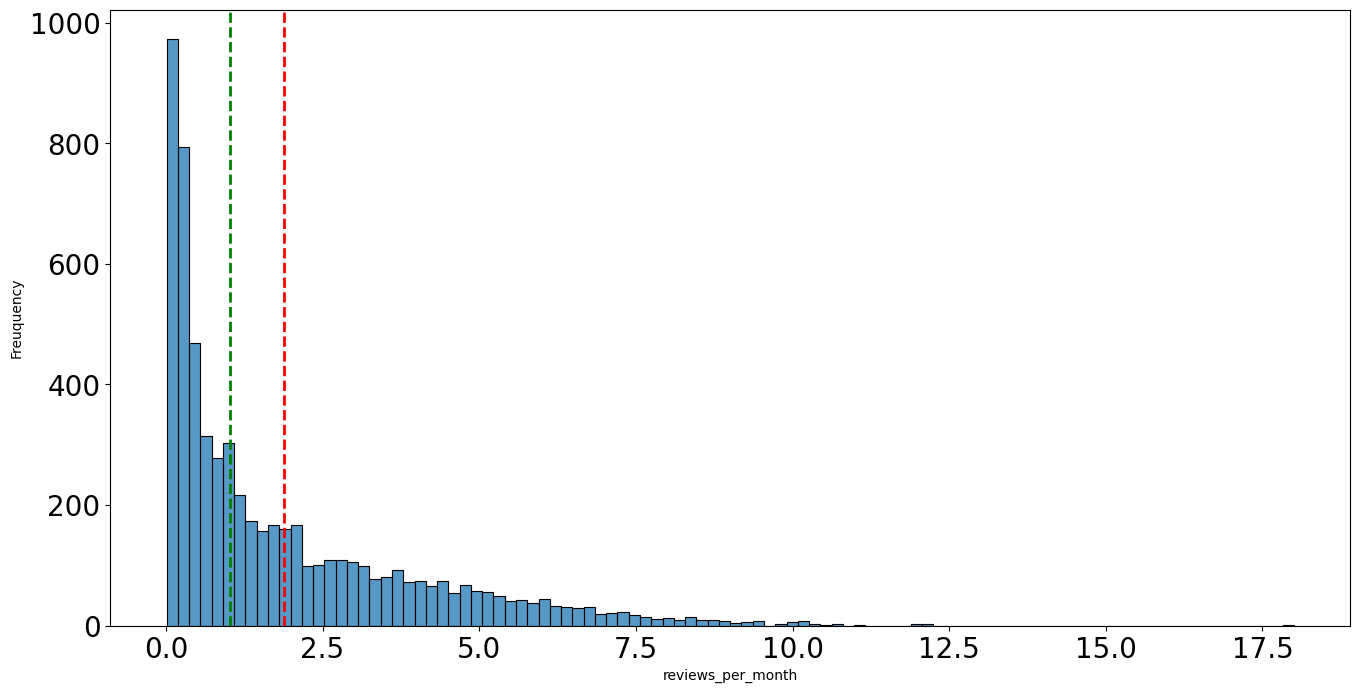

In [94]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(16, 8)
    )

sns.histplot(
    ax=ax,
    data=data["reviews_per_month"],
    bins=100
    )

ax.axvline(
    x=data["reviews_per_month"].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
    )
ax.axvline(
    x=data["reviews_per_month"].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
    )

ax.tick_params(
    axis='both',
    labelsize=20
    )

ax.set_ylabel('Freuquency')
ax.set_xlabel('reviews_per_month')

plt.show()

## 4. `reviews_per_month`의 평균과 중위수를 각 `room_type`별로 계산하여 비교하시오.

In [20]:
data.groupby("room_type").agg({"reviews_per_month":['mean', 'median']})

reviews_per_month       
                             mean median
room_type                               
Entire home/apt          1.530804  0.750
Private room             2.434912  1.815
Shared room              1.635855  0.735

## 5. `reviews_per_month`의 Boxplot을  `room_type`별로 그려서 비교하시오.

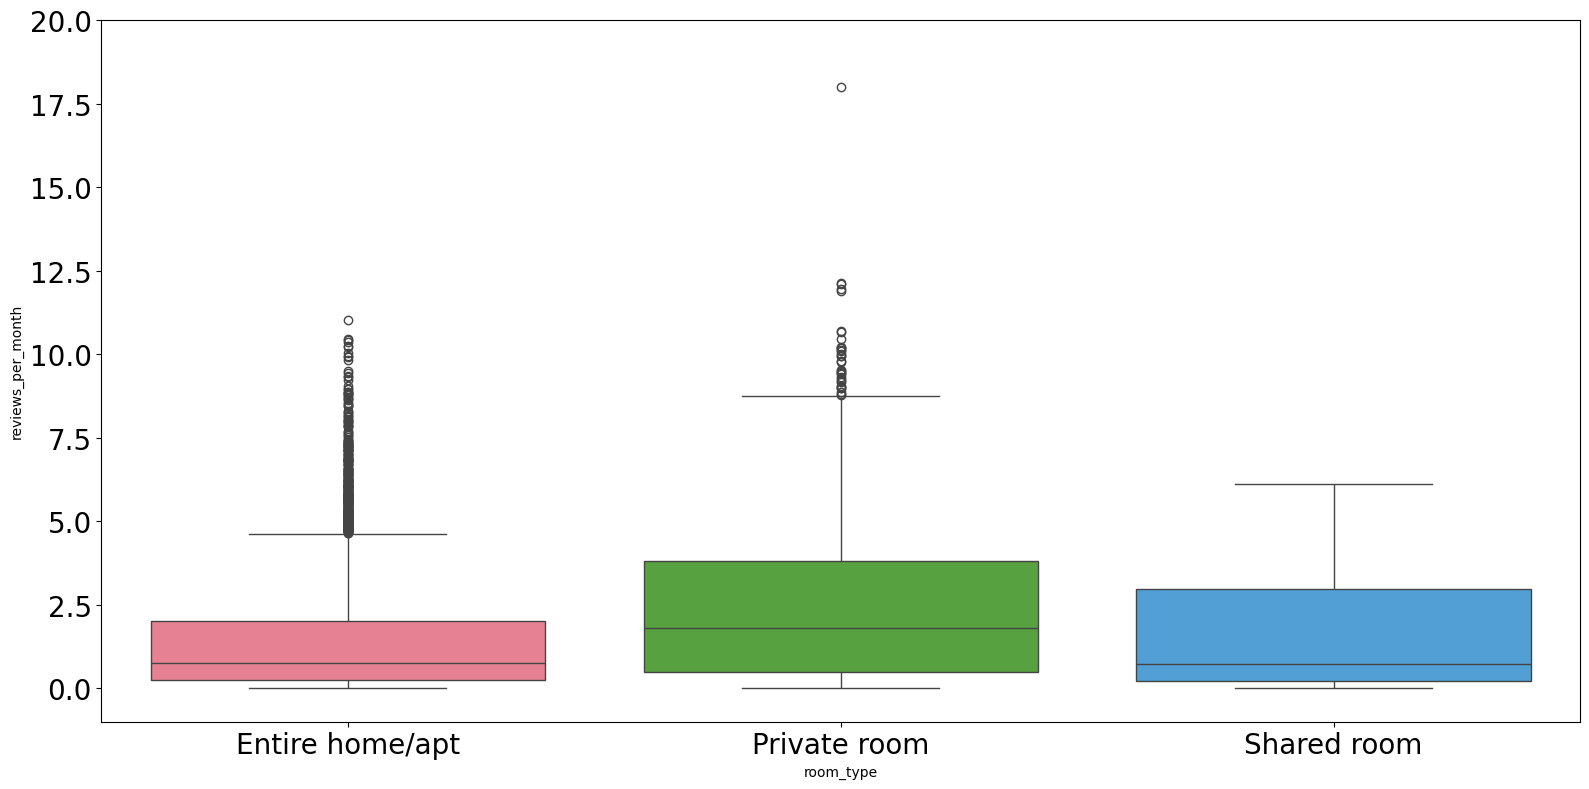

In [92]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(16, 8)
    )

palette = sns.color_palette("husl", data["room_type"].nunique())

sns.boxplot(
    ax=ax,
    data=data,
    x="room_type",
    y="reviews_per_month",
    palette=palette
    )

ax.set_ylim(-1, 20)

ax.tick_params(
    axis='both',
    labelsize=20
    )

fig.tight_layout()

fig.show()

## 6. `most_freq_aspect`의 도수분포표를 출력하고 이를 활용해 bar plot을 그려서 어떤 aspect가 가장 빈번하게 나타났는지 확인하시오.

In [64]:
data["most_freq_aspect"].value_counts(sort=True)

comm          1187
bldg           911
int_style      802
nbhd           683
attr_trans     658
facil          498
visitor        479
nature         357
bedroom        326
kitchen        204
Name: most_freq_aspect, dtype: int64

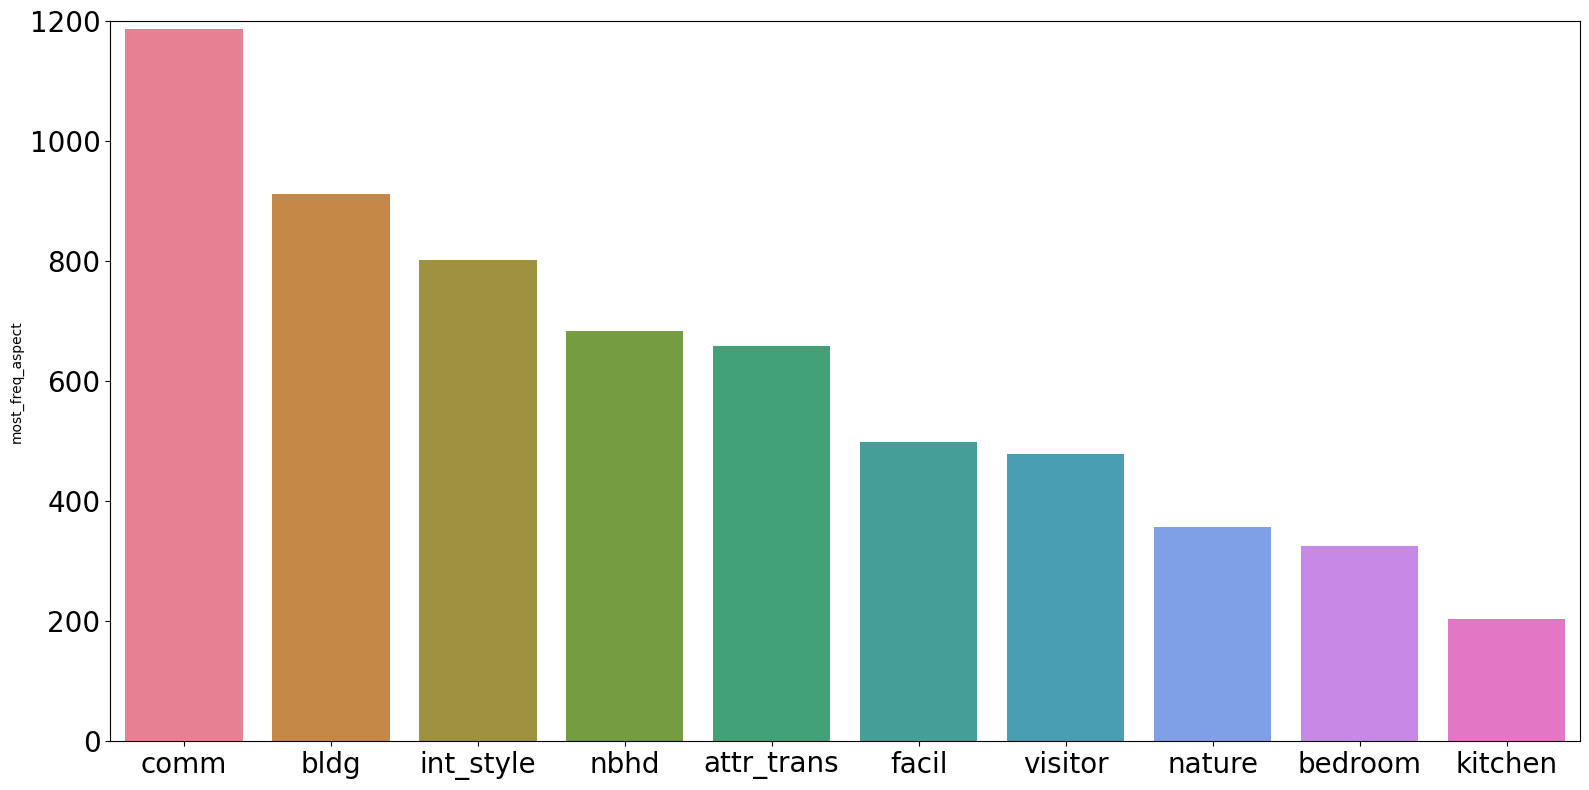

In [91]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(16, 8)
    )

palette = sns.color_palette("husl", data["most_freq_aspect"].nunique())

sns.barplot(
    ax=ax,
    data=data["most_freq_aspect"].value_counts(sort=True),
    palette=palette
    )

ax.set_ylim(0, 1200)

ax.tick_params(
    axis='both',
    labelsize=20
    )

fig.tight_layout()

fig.show()

## 7. `room_type`과 `most_freq_aspect`의 mosaic plot을 통해 `room_type` 에 따라 자주 나타나는 aspect 의 특징이 다른지 비교하시오.

- `Entire home/apt` 의 경우 `comm`, `int_style`이 빈번하게 나타남
- `Private room` 의 경우 `bldg`, `comm` 이 빈번하게 나타남
- `Shared room` 의 경우 `visitor` 가 빈번하게 나타남

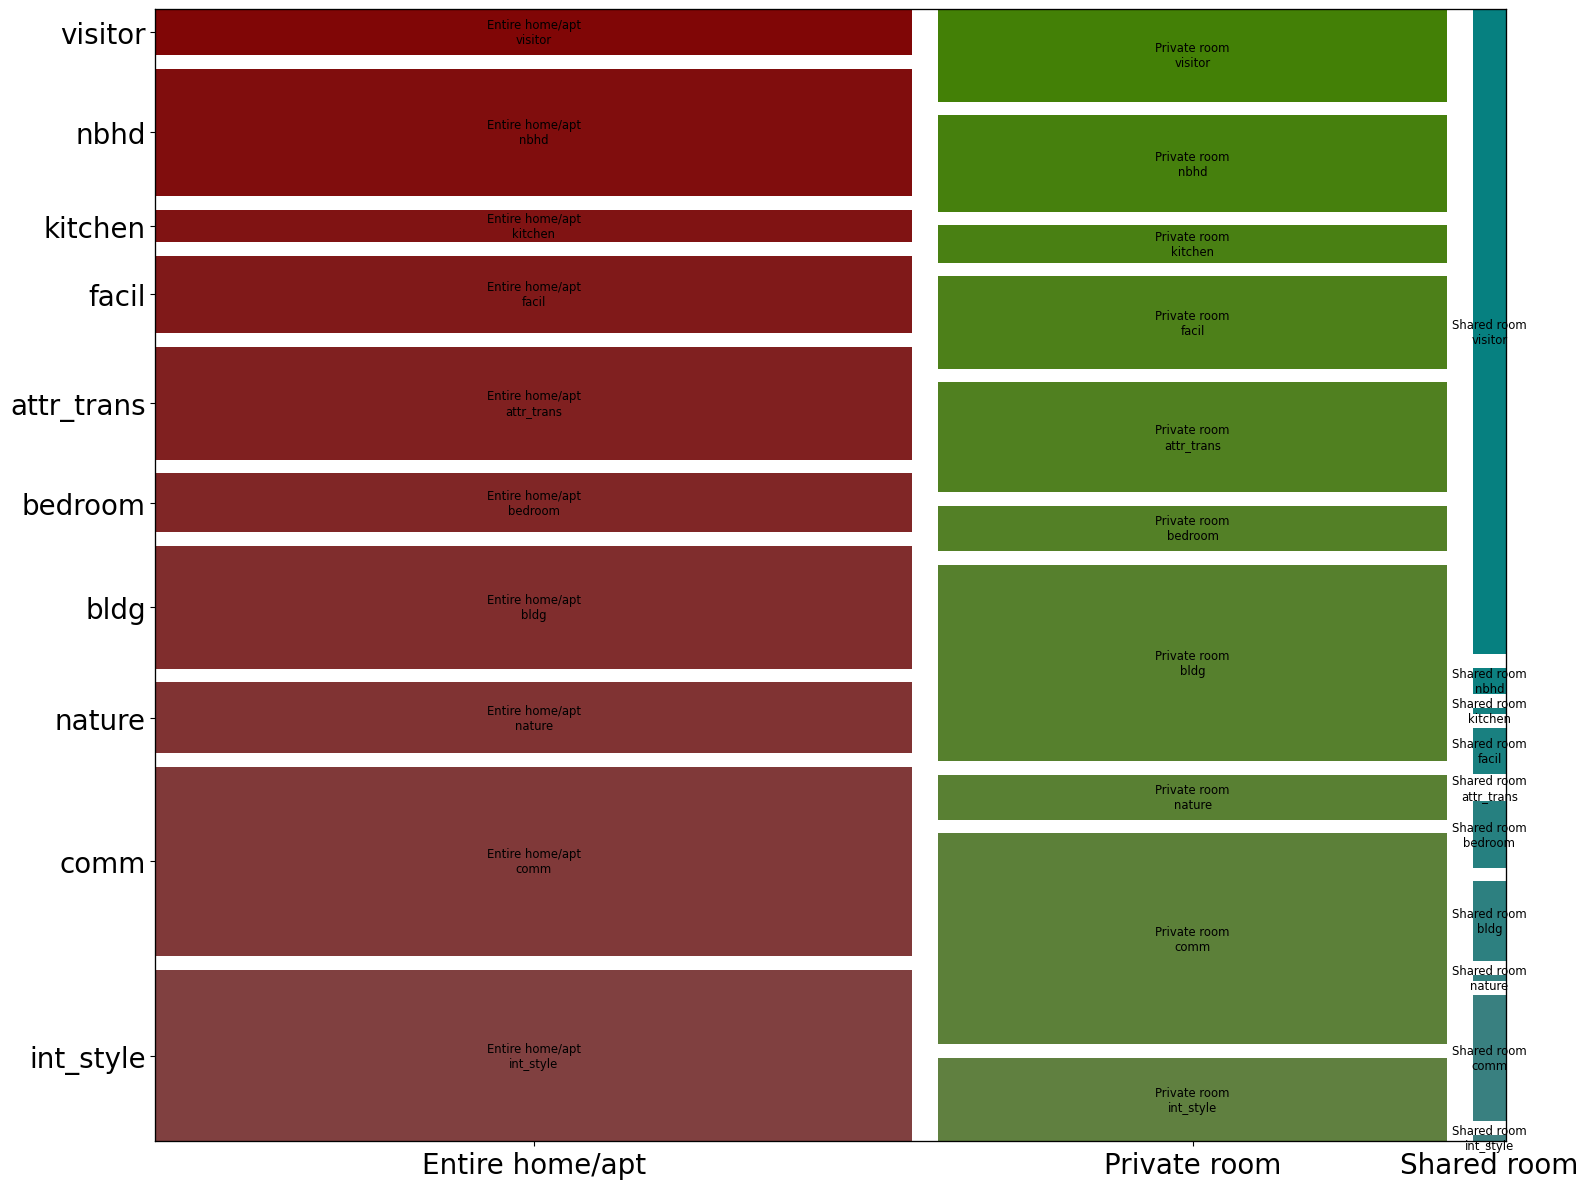

In [98]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(16, 12)
    )

mosaic(
    ax=ax,
    data=data,
    index=['room_type', 'most_freq_aspect'],
    axes_label=True,
    gap=0.02
    )

ax.tick_params(
    axis='both',
    labelsize=20
    )

fig.tight_layout()

fig.show()

## 8. 7개의 review_scores 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

- `review_socres` 간에는 전반적으로 양의 상관관계를 보임

- 특히 다음의 변수 간에는 상관관계의 강도가 강한 양상을 띰
    - `review_scores_rating`
    - `review_scores_accuracy`
    - `review_scores_cleanliness`
    - `review_scores_communication`

- 다만, `review_scores_location` 의 경우 다른 변수들과의 상관관계 강도가 비교적 약한 양상을 띰

- `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수 간에는 어느 정도 양의 상관관계를 가짐

- 단, `Downtown`, `PerCapitaIncome` 간에는 음의 상관관계가 나타남

- `review_socres` 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 간에는 유의미한 상관관계가 있다고 보기 어려움

- 다만, `review_scores_communication` 과 `PerCapitaIncome` 간에는 비교적 강한 양의 상관관계를 보임

In [105]:
col_list = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "Downtown",
    "PerCapitaIncome",
    "reviews_per_month"
    ]

data[col_list].corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Downtown,PerCapitaIncome,reviews_per_month
review_scores_rating,1.000000,0.705048,0.666860,0.485924,0.637921,0.451721,0.686506,0.054043,0.125469,0.078814
review_scores_accuracy,0.705048,1.000000,0.611907,0.462369,0.586284,0.359659,0.570344,0.084931,0.063065,0.135251
review_scores_cleanliness,0.666860,0.611907,1.000000,0.391978,0.496237,0.304013,0.533109,0.057903,0.080729,0.131440
review_scores_checkin,0.485924,0.462369,0.391978,1.000000,0.548370,0.277141,0.411180,0.094603,0.032955,0.134380
review_scores_communication,0.637921,0.586284,0.496237,0.548370,1.000000,0.294792,0.512375,0.096165,0.049202,0.124630
review_scores_location,0.451721,0.359659,0.304013,0.277141,0.294792,1.000000,0.425748,-0.080912,0.298409,0.075669
review_scores_value,0.686506,0.570344,0.533109,0.411180,0.512375,0.425748,1.000000,0.083281,0.068504,0.111472
Downtown,0.054043,0.084931,0.057903,0.094603,0.096165,-0.080912,0.083281,1.000000,-0.314239,0.267295
PerCapitaIncome,0.125469,0.063065,0.080729,0.032955,0.049202,0.298409,0.068504,-0.314239,1.000000,-0.143245
reviews_per_month,0.078814,0.135251,0.131440,0.134380,0.124630,0.075669,0.111472,0.267295,-0.143245,1.000000


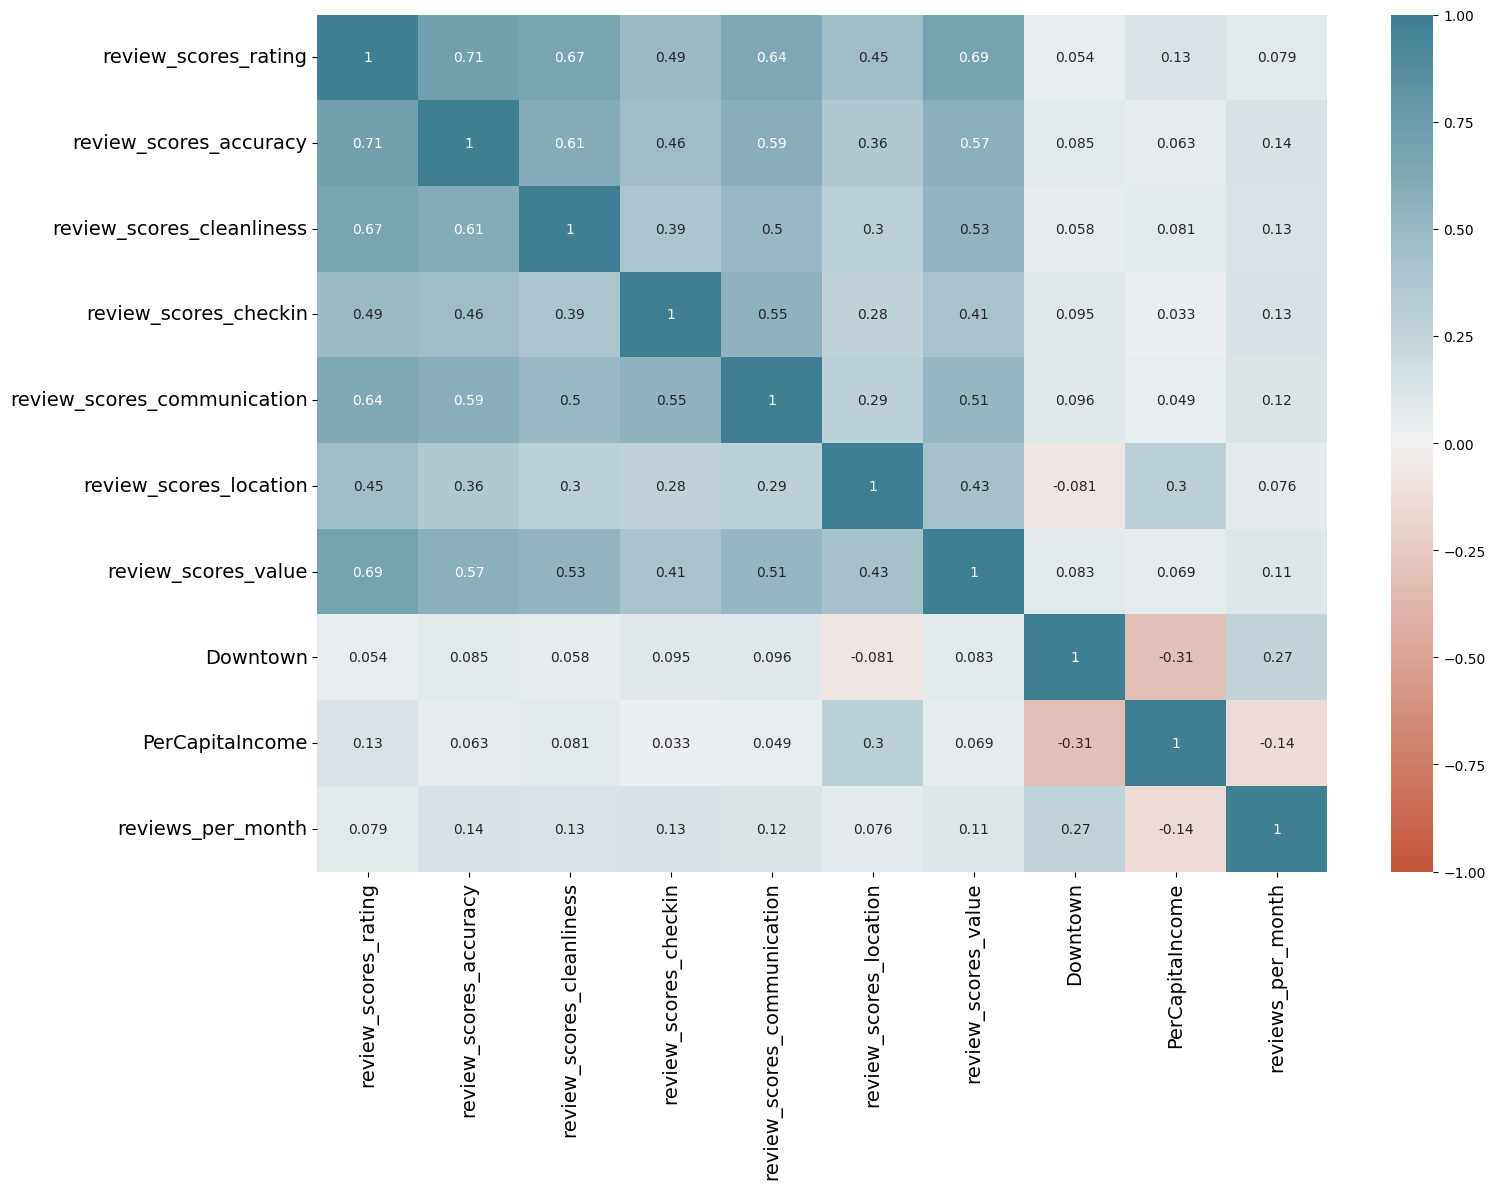

In [106]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(16, 12)
    )

palette = sns.diverging_palette(
    20,
    220,
    as_cmap=True
    )

sns.heatmap(
    ax=ax,
    data=data[col_list].corr(),
    vmin=-1,
    vmax=1,
    annot = True,
    cmap=palette
    )

ax.tick_params(
    axis='both',
    labelsize=14
    )

plt.tight_layout()

plt.show()